EGM722 Project - Lighting Column Replacements and Drainage Cleaning for MMaRC Network B. 

The M20 is one of.....

Import the required packages 

In [82]:
# Import required packages
import os
import pandas as pd               # Used for data handling
import geopandas as gpd           # Core for spatial data operations
import matplotlib.pyplot as plt   # For creating the bar chart
import folium                     # Main mapping library
from folium.plugins import MeasureControl  # For measurement tool
from folium import FeatureGroup, TileLayer  # For layer control and base maps

Load the required Datasets and Convert them to EPSG:4326/WGS84

In [83]:
#Load the required Datasets and Convert them to EPSG:4326/WGS84
def load_geospatial_data() -> tuple:
    """Loads all geospatial datasets from specified file paths.
    
    Returns:
        tuple: Contains 6 GeoDataFrames in this order:
            (MarkerPosts, Filter_Drains, Gully, Junctions, 
             Lighting_Column, Boundary)
    """
    MarkerPosts = gpd.read_file('data_files/MarkerPost_100M.shp')
    Filter_Drains = gpd.read_file('data_files/FD_Filter_Drain.shp')
    Gully = gpd.read_file('data_files/GY_Gully.shp')
    Junctions = gpd.read_file('data_files/Junctions.shp')
    Lighting_Column = gpd.read_file('data_files/LP_Lighting_Point.shp')
    Boundary = gpd.read_file('data_files/MMaRC_B_Boundary.shp')
    
    return MarkerPosts, Filter_Drains, Gully, Junctions, Lighting_Column, Boundary

def convert_to_wgs84(*gdfs: gpd.GeoDataFrame) -> tuple:
    """Converts GeoDataFrames to WGS84 (EPSG:4326) coordinate system.
    
    Args:
        *gdfs: Variable number of GeoDataFrames to convert
        
    Returns:
        tuple: Converted GeoDataFrames in same order as input
    """
    return [gdf.to_crs("EPSG:4326") for gdf in gdfs]

Display the Lighting Column Data

In [84]:
Lighting_Column.head(12)

,Network_Na,Route_Numb,Direction,Marker_Pos,Asset_Type,Asset_Inve,Unique_Ass,ITM_Eastin,ITM_Northi,Latitude,...,Column_Mat,EIWO_Numbe,GlobalID,created_us,created_da,last_edite,last_edi_1,Junction,ScheduledF,geometry
0,B,M20,East,M20 94.1 E,Lighting Point/Lighting Column,LP,LP-1899,556963.568,653355.690,52.629718,...,Steel,None,{188ACE84-4585-4F24-A73A-9B3BC82A4410},None,NaT,COATESR,2025-04-08,M20 J2,Yes,POINT (-8.63572 52.62972)
1,B,M20,East,M20 94.1 E,Lighting Point/Lighting Column,LP,LP-1900,556984.116,653385.186,52.629985,...,Steel,None,{94701500-B741-49D6-973B-7806592B8A04},None,NaT,COATESR,2025-04-08,M20 J2,Yes,POINT (-8.63542 52.62998)
2,B,M20,East,M20 94.2 E,Lighting Point/Lighting Column,LP,LP-1901,557003.843,653413.185,52.630238,...,Steel,None,{B6BE6F6F-D41C-4E62-AEB0-D1487BA2F95B},None,NaT,COATESR,2025-04-08,M20 J2,Yes,POINT (-8.63513 52.63024)
3,B,M20,West,M20 94.3 W,Lighting Point/Lighting Column,LP,LP-1902,557201.928,653425.868,52.630368,...,Steel,None,{8935E4AE-C2B9-4451-8197-0B1517D57CC9},None,NaT,COATESR,2025-04-08,M20 J2,Yes,POINT (-8.6322 52.63037)
4,B,M20,West,M20 94.3 W,Lighting Point/Lighting Column,LP,LP-1903,557181.100,653398.036,52.630116,...,Steel,None,{C4937FF3-AEB7-4CD2-809F-226F5C888867},None,NaT,COATESR,2025-04-08,M20 J2,Yes,POINT (-8.63251 52.63012)
5,B,M20,West,M20 94.3 W,Lighting Point/Lighting Column,LP,LP-1904,557159.864,653370.351,52.629865,...,Steel,None,{9F631775-2CF2-4C71-8782-26FB54DC62A9},None,NaT,COATESR,2025-04-08,M20 J2,Yes,POINT (-8.63282 52.62987)
6,B,M20,South,M20 94.2 W,Lighting Point/Lighting Column,LP,LP-1905,557150.910,653343.831,52.629626,...,Steel,None,{83B55F1C-95E6-4B15-B3BB-92415C3CD84A},None,NaT,COATESR,2025-04-08,M20 J2,No,POINT (-8.63295 52.62963)
7,B,M20,South,M20 94.2 E,Lighting Point/Lighting Column,LP,LP-1906,557064.063,653435.589,52.630444,...,Steel,None,{2A4BA236-8D15-42A3-859B-D0FE1F8088D5},None,NaT,COATESR,2025-04-08,M20 J2,No,POINT (-8.63424 52.63044)
8,B,M20,South,M20 94.2 E,Lighting Point/Lighting Column,LP,LP-1907,557071.040,653418.216,52.630288,...,Steel,None,{980CCE55-D89B-4D7A-B958-7E634B900F24},None,NaT,COATESR,2025-04-08,M20 J2,No,POINT (-8.63414 52.63029)
9,B,M20,South,M20 94.2 W,Lighting Point/Lighting Column,LP,LP-1908,557089.248,653395.567,52.630086,...,Steel,None,{E57BD9E2-78F0-4BA2-A7D7-C082806E1438},None,NaT,COATESR,2025-04-08,M20 J2,No,POINT (-8.63386 52.63009)


Graph of the number of lighting columns to be upgraded at each Junction

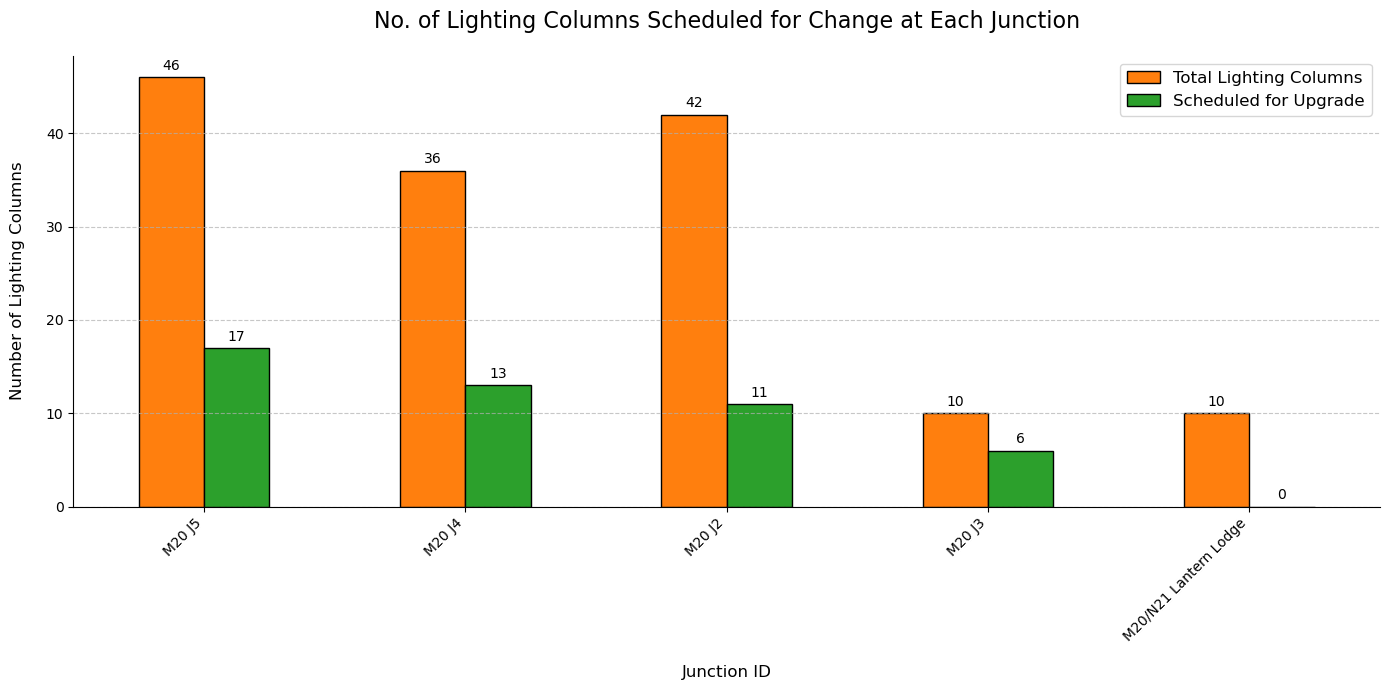

In [85]:
# Create a Bar Chart for the Lighting Column Data

def create_bar_chart(lighting_data: gpd.GeoDataFrame, top_n: int = 10) -> None:
    """Generates a bar chart comparing total vs scheduled lighting column upgrades."""
    junction_counts = lighting_data.groupby('Junction').agg(
        Total_Lamps=('Unique_Ass', 'count'),
        Lamps_to_Change=('ScheduledF', lambda x: (x == 'Yes').sum())
    ).reset_index().sort_values('Lamps_to_Change', ascending=False)

    plt.figure(figsize=(14, 7))
    ax = plt.subplot(111)
    colors = ['#ff7f0e', '#2ca02c']

    junction_counts.head(top_n).plot(
        x='Junction',
        y=['Total_Lamps', 'Lamps_to_Change'],
        kind='bar',
        ax=ax,
        color=colors,
        edgecolor='black'
    )

    plt.title('No. of Lighting Columns Scheduled for Change at Each Junction', 
             fontsize=16, pad=20)
    plt.xlabel('Junction ID', fontsize=12, labelpad=15)
    plt.ylabel('Number of Lighting Columns', fontsize=12, labelpad=15)
    plt.xticks(rotation=45, ha='right', fontsize=10)
    plt.yticks(fontsize=10)
    ax.spines[['top', 'right']].set_visible(False)
    ax.grid(axis='y', linestyle='--', alpha=0.7)

    for container in ax.containers:
        ax.bar_label(container, label_type='edge', padding=3, 
                    fontsize=10, color='black', fmt='%d')

    plt.legend(['Total Lighting Columns', 'Scheduled for Upgrade'], 
              fontsize=12, bbox_to_anchor=(1, 1))
    plt.tight_layout()
    plt.show()

# To run the code
if __name__ == "__main__":
    # Load and prepare data
    raw_data = load_geospatial_data()
    wgs84_data = convert_to_wgs84(*raw_data)
    MarkerPosts, Filter_Drains, Gully, Junctions, Lighting_Column, Boundary = wgs84_data
# Create and display bar chart
create_bar_chart(Lighting_Column)

Create a map to display the Lighting Columns, Marker Posts, Junctions, Gullies, Filter Drains and Boundary data

In [86]:
# Create base map that zooms into Junction 5 - The first junction that works are scheduled for.
m = folium.Map(
    location=[52.5856, -8.7211],
    zoom_start=18,
    tiles="Esri.WorldImagery"
)

# Add OpenStreetMap as additional base layer. The basemaps can be changed 
TileLayer('OpenStreetMap', name='OpenStreetMap').add_to(m)


# Add Boundary polygon
Boundary.explore(
    m=m,
    color='red',
    style_kwds={'fill': False},
    name='MMaRC_B_Boundary'
)

# Add Gully points
Gully.explore(
    m=m,
    marker_kwds={
        'radius': 5,
        'fill': True,
        'fillColor': 'yellow', 
        'color': 'black',      
        'weight': 1.5,          
        'fillOpacity': 1
    },
    name='Gully'
)

# Add Filter Drains lines
Filter_Drains.explore(
    m=m,
    color='blue',
    style_kwds={'weight': 1.5},
    name='Filter Drains'
)

# Add Junctions and Junction Labels
for idx, row in Junctions.iterrows():
    if not row.geometry.is_empty and pd.notnull(row['Junction_N']):
        folium.Marker(
            location=[row.geometry.y, row.geometry.x],
            icon=folium.Icon(
                color='lightred',
                icon='map-pin',
                prefix='fa',
                icon_size=(25, 25)
            )
        ).add_to(m)
        
        # Junction Label
        label = folium.DivIcon(
            html=f"""<div style="
                color: lightred;
                font-size: 20px;
                font-weight: bold;
                position: absolute;
                transform: translate(-50%, -125%);
                z-index: 9999;">{row['Junction_N']}</div>"""
        )
        folium.Marker(
            location=[row.geometry.y, row.geometry.x],
            icon=label,
            icon_size=(0, 0)
        ).add_to(m)

# Add Lighting Columns
Lighting_Column.explore(
    m=m,
    column='ScheduledF',
    categorical=True,
    categories=['Yes', 'No'],
    cmap=['green', 'orange'],
    marker_kwds={'radius': 7},
    name='Lighting Columns'
)

# Add Marker Posts
MarkerPosts.explore(
    m=m,
    color='red',
    marker_kwds={'radius': 5},
    name='Marker Posts'
)

# Create a Legend for the map using CSS classes
legend_html = """
<div class="legend-container">
    <h4 class="legend-title">Legend</h4>
    
    <div class="legend-item">
        <i class="fa fa-map-pin legend-icon junction-icon"></i>
        <span>Junctions</span>
    </div>
    
    <div class="legend-item">
        <div class="legend-line boundary-line"></div>
        <span>Boundary</span>
    </div>
    
    <div class="legend-item">
        <div class="legend-icon gully-icon"></div>
        <span>Gully</span>
    </div>
    
    <div class="legend-item">
        <div class="legend-line drain-line"></div>
        <span>Filter Drains</span>
    </div>
    
    <div class="legend-item">
        <div class="legend-icon lamp-upgraded"></div>
        <span>Lighting Columns To Be Upgraded</span>
    </div>
    
    <div class="legend-item">
        <div class="legend-icon lamp-existing"></div>
        <span>Lighting Columns to Remain As Is</span>
    </div>
    
    <div class="legend-item">
        <div class="legend-icon marker-icon"></div>
        <span>Marker Posts - M20</span>
    </div>

    <style>
        .legend-container {
            position: fixed; 
            bottom: 50px; 
            left: 50px; 
            z-index: 1000;
            background: white;
            border: 2px solid grey;
            border-radius: 5px;
            padding: 10px;
            font-size: 12px;
            max-width: 250px;
        }
        
        .legend-title {
            margin: 0 0 5px 0;
            font-size: 14px;
        }
        
        .legend-item {
            display: flex;
            align-items: center;
            margin-bottom: 5px;
        }
        
        .legend-icon {
            width: 20px;
            height: 20px;
            margin-right: 5px;
            border: 1px solid black;
            border-radius: 50%;
        }
        
        .junction-icon {
            color: lightred;
            font-size: 18px;
            border: none;
        }
        
        .legend-line {
            width: 20px;
            height: 0;
            margin-right: 5px;
        }
        
        .boundary-line { border: 2px solid red; }
        .drain-line { border-bottom: 2px solid blue; }
        .gully-icon { background: yellow; }
        .lamp-upgraded { background: green; }
        .lamp-existing { background: orange; }
        .marker-icon { background: red; }
    </style>
</div>
"""
m.get_root().html.add_child(folium.Element(legend_html))

# Add labels for Lighting Columns
for idx, row in Lighting_Column.iterrows():
    if not row.geometry.is_empty and pd.notnull(row['Unique_Ass']):
        label_color = 'green' if row['ScheduledF'] == 'Yes' else 'orange'
        label = folium.DivIcon(
            html=f"""<div style="
                color: {label_color};
                font-size: 12px;
                font-weight: bold;
                position: absolute;
                transform: translate(-50%, -100%);
                z-index: 9999;">{row['Unique_Ass']}</div>"""
        )
        folium.Marker(
            location=[row.geometry.y, row.geometry.x],
            icon=label,
            icon_size=(0, 0)
        ).add_to(m)

# Add Marker Post labels
for idx, row in MarkerPosts.iterrows():
    if not row.geometry.is_empty and pd.notnull(row['mVal']):
        label = folium.DivIcon(
            html=f"""<div style="
                color: white;
                font-size: 12px;
                font-weight: bold;
                transform: translate(-50%, -100%);
                z-index: 9999;">{row['mVal']}</div>"""
        )
        folium.Marker(
            location=[row.geometry.y, row.geometry.x],
            icon=label,
            icon_size=(0, 0)
        ).add_to(m)

# Add Gully labels
for idx, row in Gully.iterrows():
    if not row.geometry.is_empty and pd.notnull(row['Unique_Ass']):
        label = folium.DivIcon(
            html=f"""<div style="
                color: black;
                font-size: 10px;
                font-weight: bold;
                transform: translate(-50%, -100%);
                z-index: 9999;">{row['Unique_Ass']}</div>"""
        )
        folium.Marker(
            location=[row.geometry.y, row.geometry.x],
            icon=label,
            icon_size=(0, 0)
        ).add_to(m)

# Add Filter Drains labels
for idx, row in Filter_Drains.iterrows():
    if not row.geometry.is_empty and pd.notnull(row['Unique_Ass']):
        centroid = row.geometry.centroid
        label = folium.DivIcon(
            html=f"""<div style="
                color: blue;
                font-size: 12px;
                font-weight: bold;
                transform: translate(-50%, -100%);
                z-index: 9999;">{row['Unique_Ass']}</div>"""
        )
        folium.Marker(
            location=[centroid.y, centroid.x],
            icon=label,
            icon_size=(0, 0)
        ).add_to(m)


# Add distance tool to the map. This will allow the user to measure distances between the different assets.
MeasureControl(position="bottomleft", primary_length_unit="meters").add_to(m)
folium.LayerControl().add_to(m)

m  # Display map

Create a table that shows the results of a cost savings analysis

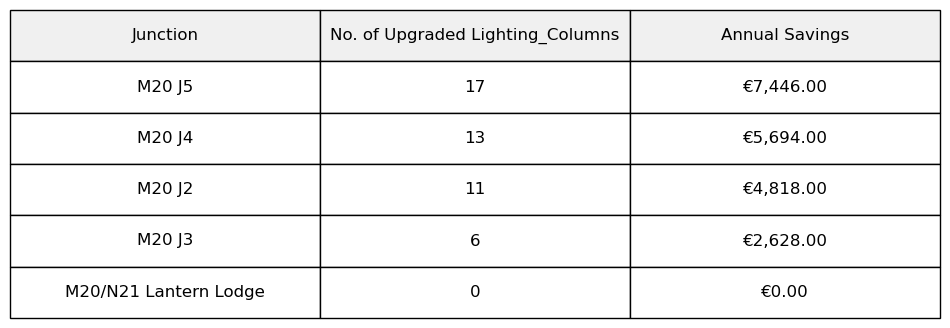

In [87]:
def create_savings_table(lighting_data: gpd.GeoDataFrame, top_n: int = 10) -> None:
    """Generates the Lighting Column Upgrade Projected Savings table."""
    # Constants for savings calculation
    SAVINGS_PER_LAMP_PER_HOUR = 0.15  # cents
    HOURS_PER_DAY = 8
    DAYS_PER_YEAR = 365

    # Process data and calculate savings
    junction_counts = lighting_data.groupby('Junction').agg(
        Total_Lamps=('Unique_Ass', 'count'),
        Lamps_to_Change=('ScheduledF', lambda x: (x == 'Yes').sum())
    ).reset_index().sort_values('Lamps_to_Change', ascending=False)

    # Calculate annual savings in euros
    junction_counts['Annual_Savings'] = (
        junction_counts['Lamps_to_Change'] * 
        SAVINGS_PER_LAMP_PER_HOUR * 
        HOURS_PER_DAY * 
        DAYS_PER_YEAR
    ) 

    # Prepare table data
    table_data = junction_counts[['Junction', 'Lamps_to_Change', 'Annual_Savings']].head(top_n)
    table_data['Annual_Savings'] = table_data['Annual_Savings'].round(2).apply(lambda x: f'€{x:,.2f}')

    # Create figure with just the table
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.axis('off')  # Hide axes

    
    # To create the table
    table = plt.table(
        cellText=table_data.values,
        colLabels=['Junction', 'No. of Upgraded Lighting_Columns', 'Annual Savings'],
        colColours=['#f0f0f0', '#f0f0f0', '#f0f0f0'],
        cellLoc='center',
        loc='center',
        bbox=[0, 0, 1, 1]  # Fill available space
    )

    # Style table
    table.auto_set_font_size(False)
    table.set_fontsize(12)
    table.scale(1.2, 1.2) 

    plt.show()

# Generate the table
create_savings_table(Lighting_Column)

Create a .csv file that contains the information of the Lighting_Point shapefile

In [88]:
# Create a CSV file of the Lighting_Point Data
pd.DataFrame(Lighting_Column.drop(columns='geometry')).to_csv(
    r'C:\Users\royco\OneDrive - Ulster University\Documents\GitHub\EGM722Project\lighting_column_data.csv',
    index=False
)
os.makedirs(r'C:\Users\royco\OneDrive - Ulster University\Documents\GitHub\EGM722Project', exist_ok=True)